# 불균형데이터의 예측 성능

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np

from sklearn import preprocessing, model_selection, metrics, pipeline 
import scikitplot as skplt

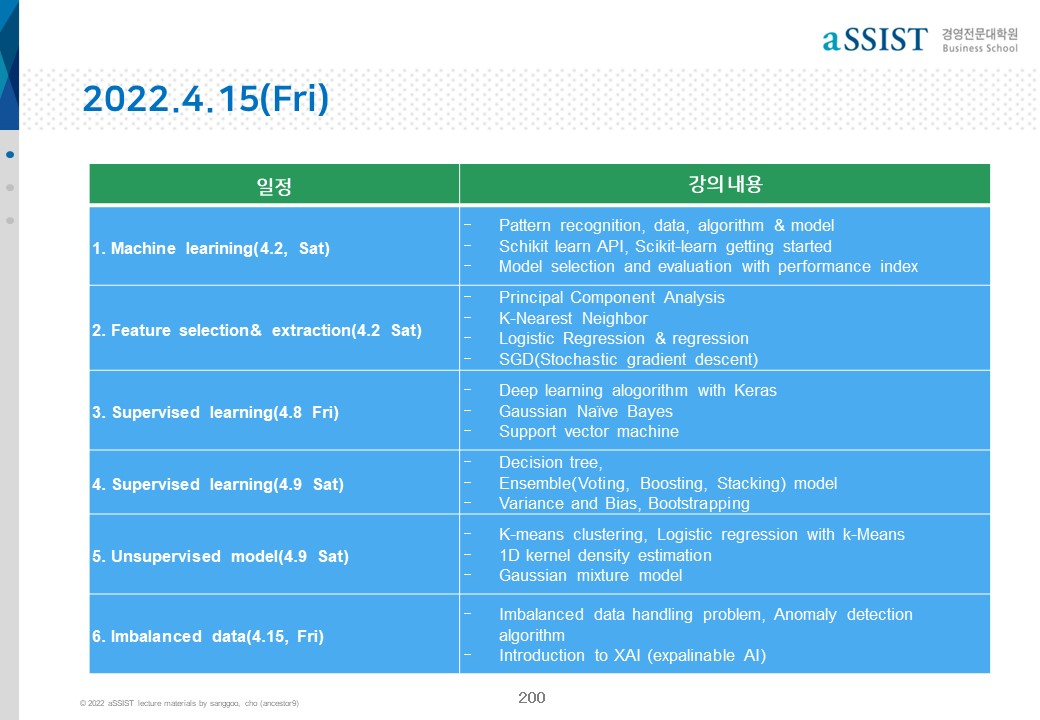

In [2]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img\aSSIST_20220111_1학기_조상구'
Image(filename=dir_path +'/슬라이드200.jpg', width=width, height=height)

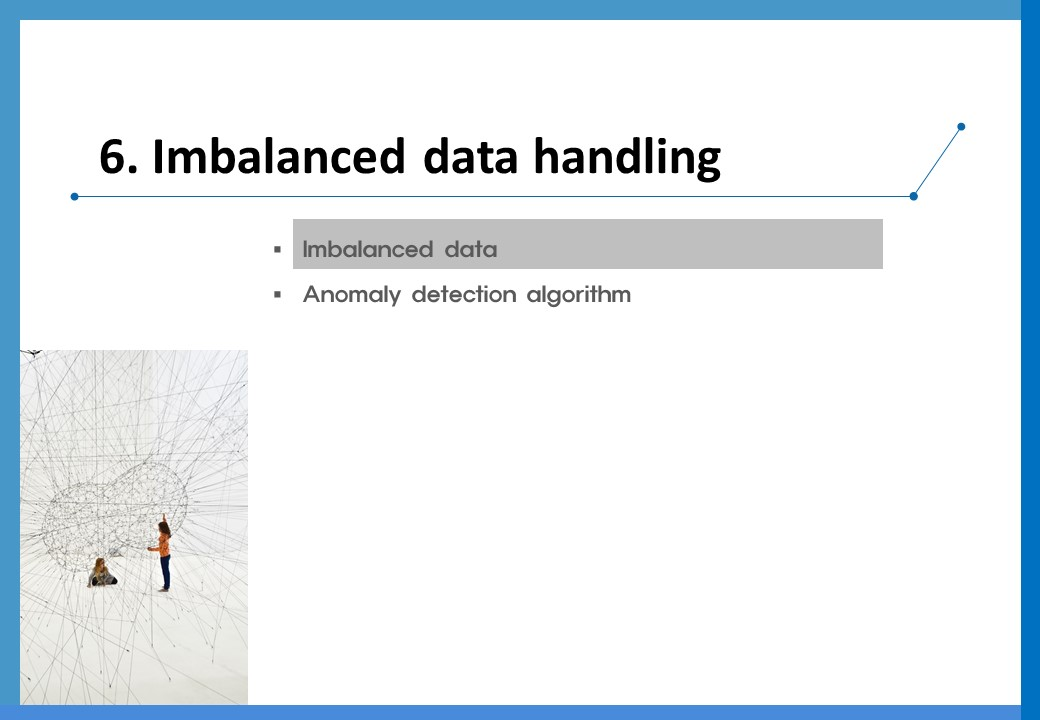

In [3]:
Image(filename=dir_path + '/슬라이드201.jpg', width=width, height=height)

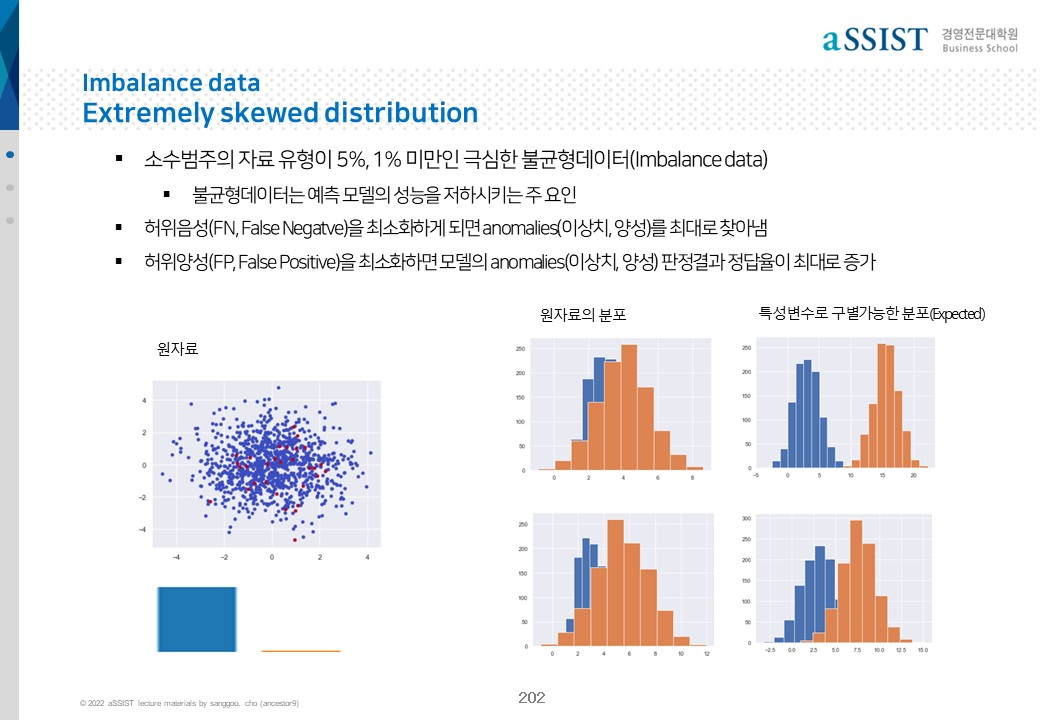

In [4]:
Image(filename=dir_path + '/슬라이드202.jpg', width=width, height=height)

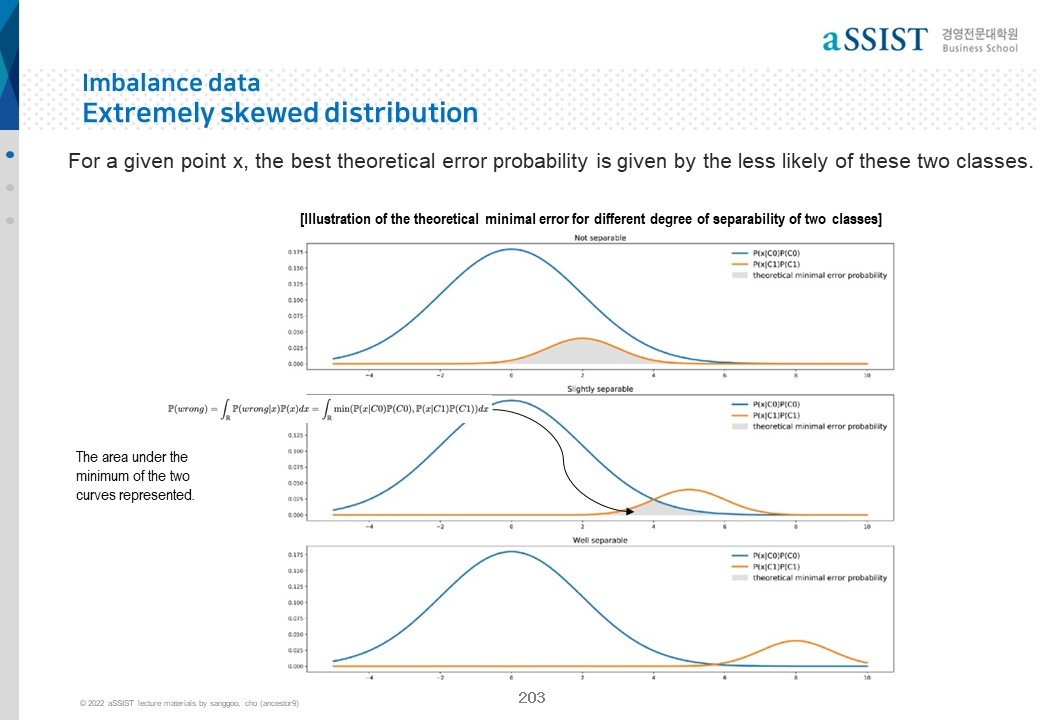

In [5]:
Image(filename=dir_path + '/슬라이드203.jpg', width=width, height=height)

## Threshold value에 따른 변화
<img src='https://www.jeremyjordan.me/content/images/2018/11/roc_cutoff-1.gif'>

# PR graph의 중요성
## Data Obtain

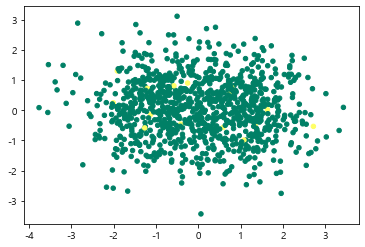

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01],
                          random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='summer')

In [5]:
X.shape

(1000, 20)

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.5, 
                                                                    random_state = 2, stratify=y)
print(f'Dataset: Class 0(음성)= {len(y[y==0])} 개, Class1(양성)={len(y[y==1])} 개')

Dataset: Class 0(음성)= 985 개, Class1(양성)=15 개


In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
y_pred = clf.fit(X_train, y_train).predict(X_test)
y_probas = clf.fit(X_train, y_train).predict_proba(X_test)
target_names = ['Negative (0)', 'Positive(1)']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Negative (0)       0.99      1.00      0.99       493
 Positive(1)       0.00      0.00      0.00         7

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.99      0.98       500



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

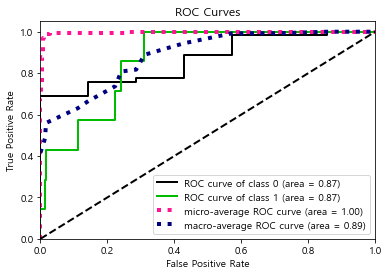

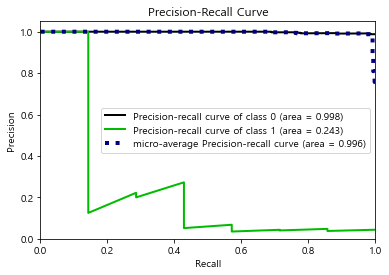

In [8]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

## ROC와 PR curve는 다른 이야기를 하고 있으며 불균형데이터의 예측 성능지표는 AUROC보다는 PR그래프가 우수하다.
### PR 그래프는 소수 범주 자료(양성, 1%)에 집중하는 반면 ROC curve는 음성과 양성 범주 자료를 모두 고려하기 때문이다.

If we use a threshold
of 0.5 and use the logistic regression model to make a prediction for all examples in the test
set, we see that it predicts class 0 or the majority class in all cases. This can be confirmed by
using the fit model to predict crisp class labels that will use the default threshold of 0.5. The
distribution of predicted class labels can then be summarized.

### 사이킷런 내부 모델의 의사결정임계값은 '0.5'로 예측 모델의 결과인 500개는 모두 음성으로 판정한 것을 확인할 수있으며 양성판정 비율은 모두 0.22 이하인 것으로 나타남

Counter({0: 500})

Text(0.5, 1.0, '양성판정확률의 도수분포도')

Text(0.5, 0, '양성판정확률')

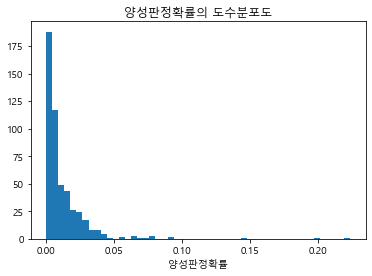

In [9]:
from collections import Counter
Counter(y_pred)
ax = plt.hist(y_probas[:, 1], bins=50)
plt.title('양성판정확률의 도수분포도'); plt.xlabel('양성판정확률')

# Imbalanced_classification

In [22]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img'

## Probability Threshold Moving
## 1.  Optimal Threshold for ROC Curve

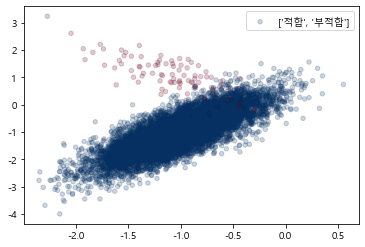

In [10]:
X, y = make_classification(n_samples=10000, n_features=5, n_redundant=3,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='RdBu_r', alpha=0.2, label=['적합','부적합'])
plt.legend()

The Geometric Mean or G-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and
the specificity. One approach would be to test the model with each threshold returned from the call roc auc score() and select the threshold with the largest G-mean value.

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

LogisticRegression()

              precision    recall  f1-score   support

Negative (0)       1.00      1.00      1.00      4950
 Positive(1)       0.97      0.56      0.71        50

    accuracy                           1.00      5000
   macro avg       0.98      0.78      0.85      5000
weighted avg       1.00      1.00      0.99      5000



Text(0.5, 1.0, '양성판정확률의 도수분포도')

Text(0.5, 0, '양성판정확률')

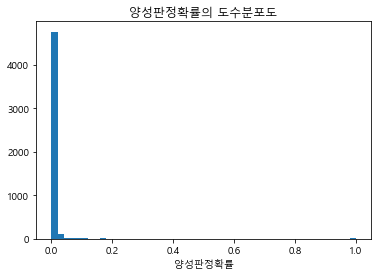

In [12]:
ax = plt.hist(y_probas[:, 1], bins=50)
plt.title('양성판정확률의 도수분포도'); plt.xlabel('양성판정확률')

Best Threshold=0.018570559212865975, G-mean=0.9284395510748128


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Best Threshold=0.018570559212865975, G-mean=0.9284395510748128


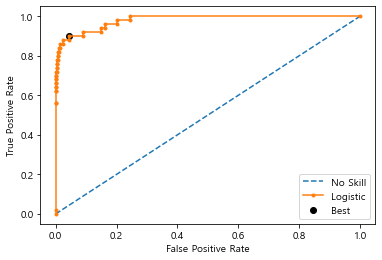

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probas[:, 1])
gmeans = np.sqrt(tpr * (1-fpr)) # calculate the g-mean for each threshold
ix = np.argmax(gmeans) # locate the index of the largest g-mean
print(f'Best Threshold={thresholds[ix]}, G-mean={gmeans[ix]}')

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend()
print(f'Best Threshold={thresholds[ix]}, G-mean={gmeans[ix]}')

It turns out there is a much faster way to get the same result, called the Youden’s J statistic. The statistic is calculated as:
### J = Sensitivity + Specificity − 1 = Sensitivity + (1 − FalsePositiveRate) − 1 =  TruePositiveRate − FalsePositiveRate

In [14]:
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print(f'Best Threshold= {best_thresh}')

Best Threshold= 0.018570559212865975


## 2. Optimal Threshold for Precision-Recall Curve
### 2. 1 Unlike the ROC Curve, a precision-recall curve focuses on the performance of a classifier on the positive (minority class) only.

Best Threshold=  0.291, F-measure= 0.759


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Best Threshold=  0.291, F-measure= 0.759


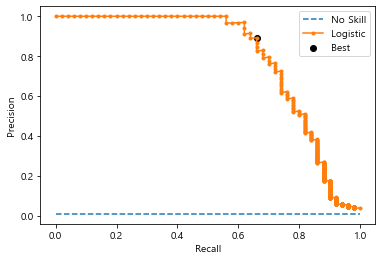

In [15]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_probas[:,1])
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore) # locate the index of the largest f-measure
print(f'Best Threshold= {thresholds[ix]: .3f}, F-measure={fscore[ix]: .3f}')
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.legend()
print(f'Best Threshold= {thresholds[ix]: .3f}, F-measure={fscore[ix]: .3f}')

### 2.2. Optimal Threshold Tuning
Sometimes, we simply have a model and we wish to know the best threshold directly. In this case, we can define a set of thresholds and then evaluate predicted probabilities under each in order to find and select the optimal threshold.

In [16]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

probs = y_probas[:, 1] # keep probabilities for the positive outcome only
thresholds = np.arange(0, 1, 0.001)
p, r, thresholds = metrics.precision_recall_curve(y_test, probs)
(pd.DataFrame(np.vstack([p, r]), index=['정밀도', '재현율']).round(2).
 append(pd.DataFrame(thresholds,columns=['분류임계값']).T.round(2))
)

,0,1,2,3,4,5,6,7,8,9,...,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266
정밀도,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0
재현율,1.00,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,...,0.18,0.16,0.14,0.12,0.1,0.08,0.06,0.04,0.02,0.0
분류임계값,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.98,0.98,0.99,0.99,1.0,1.00,1.00,1.00,1.00,NaN


### 분류임계값에 따라 Positive 판정율 내리는 비율
- 재현율과 정밀도가 교차하는 지점이 오른쪽에 있을 수록 better estimator

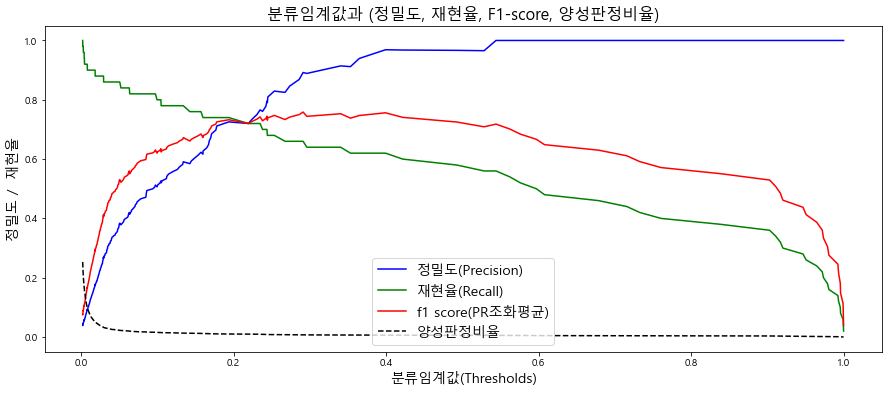

In [17]:
scores = [np.sum(to_labels(probs, t))/len(probs) for t in thresholds]
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.rcParams["figure.figsize"] = (15,6)
    plt.title('분류임계값과 (정밀도, 재현율, F1-score, 양성판정비율)', fontsize='16') 
    plt.plot(thresholds, precisions[:-1], 'b-', label='정밀도(Precision)') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율(Recall)') # 검사
    plt.plot(thresholds, (2*precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]), 
             'r-', label='f1 score(PR조화평균)') # 변호사
    plt.plot(thresholds, scores, 'k--', label='양성판정비율') # q-ratio
    plt.ylabel('정밀도 /  재현율', fontsize='14') 
    plt.xlabel('분류임계값(Thresholds)', fontsize='14') 
    plt.legend(loc='best', fontsize='14') 
    
plot_precision_recall_vs_threshold(p, r, thresholds)

## 다양한 metrics로 Tuning

In [18]:
ftwo_scorer = metrics.make_scorer(metrics.fbeta_score, beta=2)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'recall_macro', ftwo_scorer]

params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
for score in scoring:
    grid = model_selection.RandomizedSearchCV(model, param_distributions=params, cv=5, scoring= score)
    print(f'예측 성능 지표= {score}')
    print('-'*70)
    y_predict = grid.fit(X_train, y_train).predict(X_test)
    print(metrics.classification_report(y_test, y_predict))
    print('-'*70)

예측 성능 지표= accuracy
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4950
           1       0.97      0.62      0.76        50

    accuracy                           1.00      5000
   macro avg       0.98      0.81      0.88      5000
weighted avg       1.00      1.00      1.00      5000

----------------------------------------------------------------------
예측 성능 지표= precision
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4950
           1       1.00      0.46      0.63        50

    accuracy                           0.99      5000
   macro avg       1.00      0.73      0.81      5000
weighted avg       0.99      0.99      0.99      5000

----------------------------------------------------------------------
예측 성능 지표= recall
------

In [19]:
grid.best_estimator_

LogisticRegression(C=545.5594781168514)

In [20]:
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
for key, _ in scorers.items():
    print(key)
    grid = model_selection.RandomizedSearchCV(model, param_distributions=params, cv=5, 
                                              scoring= scorers,
                                              refit= key)
    grid.fit(X_train, y_train)
    grid.best_estimator_

precision_score


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   refit='precision_score',
                   scoring={'accuracy_score': make_scorer(accuracy_score),
                            'precision_score': make_scorer(precision_score),
                            'recall_score': make_scorer(recall_score)})

LogisticRegression(C=1.623776739188721)

recall_score


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   refit='recall_score',
                   scoring={'accuracy_score': make_scorer(accuracy_score),
                            'precision_score': make_scorer(precision_score),
                            'recall_score': make_scorer(recall_score)})

LogisticRegression(C=78.47599703514607)

accuracy_score


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   refit='accuracy_score',
                   scoring={'accuracy_score': make_scorer(accuracy_score),
                            'precision_score': make_scorer(precision_score),
                            'recall_score': make_scorer(recall_score)})

LogisticRegression(C=1438.44988828766)

In [21]:
grid.cv_results_.keys()
results= pd.DataFrame(grid.cv_results_)[['params','rank_test_precision_score', 
                                       'rank_test_recall_score','rank_test_accuracy_score']]
results

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_penalty', 'param_C', 'params', 'split0_test_precision_score', 'split1_test_precision_score', 'split2_test_precision_score', 'split3_test_precision_score', 'split4_test_precision_score', 'mean_test_precision_score', 'std_test_precision_score', 'rank_test_precision_score', 'split0_test_recall_score', 'split1_test_recall_score', 'split2_test_recall_score', 'split3_test_recall_score', 'split4_test_recall_score', 'mean_test_recall_score', 'std_test_recall_score', 'rank_test_recall_score', 'split0_test_accuracy_score', 'split1_test_accuracy_score', 'split2_test_accuracy_score', 'split3_test_accuracy_score', 'split4_test_accuracy_score', 'mean_test_accuracy_score', 'std_test_accuracy_score', 'rank_test_accuracy_score'])

,params,rank_test_precision_score,rank_test_recall_score,rank_test_accuracy_score
0,"{'penalty': 'l1', 'C': 11.288378916846883}",7,7,7
1,"{'penalty': 'l2', 'C': 1438.44988828766}",3,1,1
2,"{'penalty': 'l2', 'C': 0.615848211066026}",1,4,4
3,"{'penalty': 'l2', 'C': 29.763514416313132}",3,1,1
4,"{'penalty': 'l1', 'C': 10000.0}",8,8,8
5,"{'penalty': 'l1', 'C': 0.615848211066026}",9,9,9
6,"{'penalty': 'l2', 'C': 0.23357214690901212}",1,5,5
7,"{'penalty': 'l2', 'C': 206.913808111479}",3,1,1
8,"{'penalty': 'l2', 'C': 0.00026366508987303583}",6,6,6
9,"{'penalty': 'l1', 'C': 3792.690190732246}",10,10,10


## 손실함수 조정

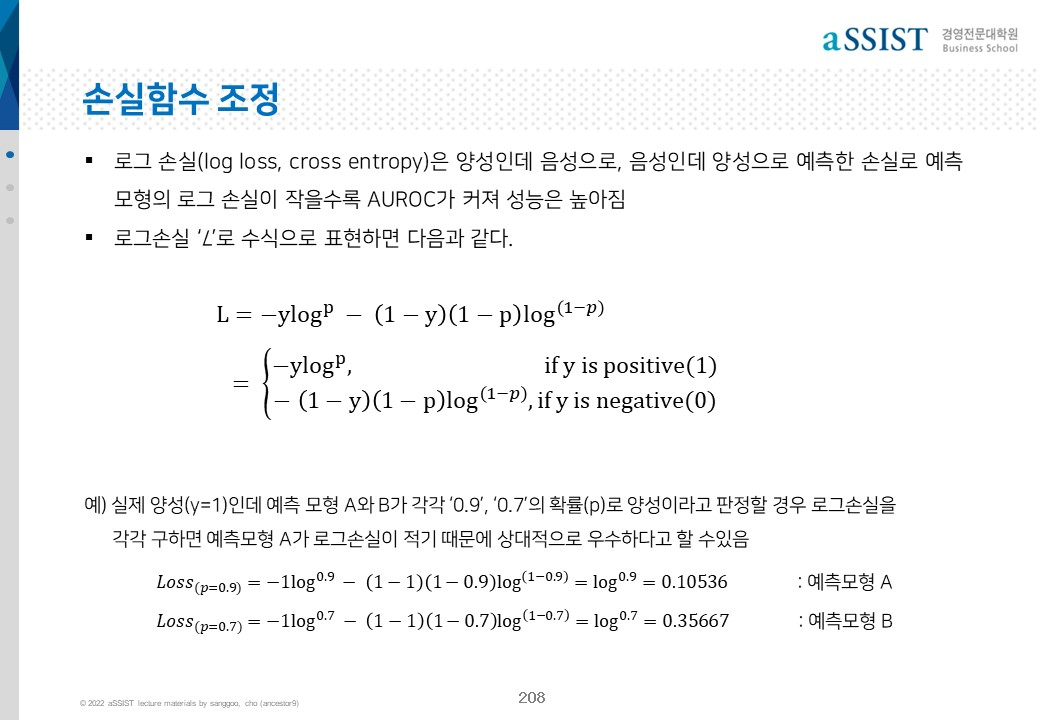

In [6]:
Image(filename=dir_path + '/슬라이드208.jpg', width=width, height=height)

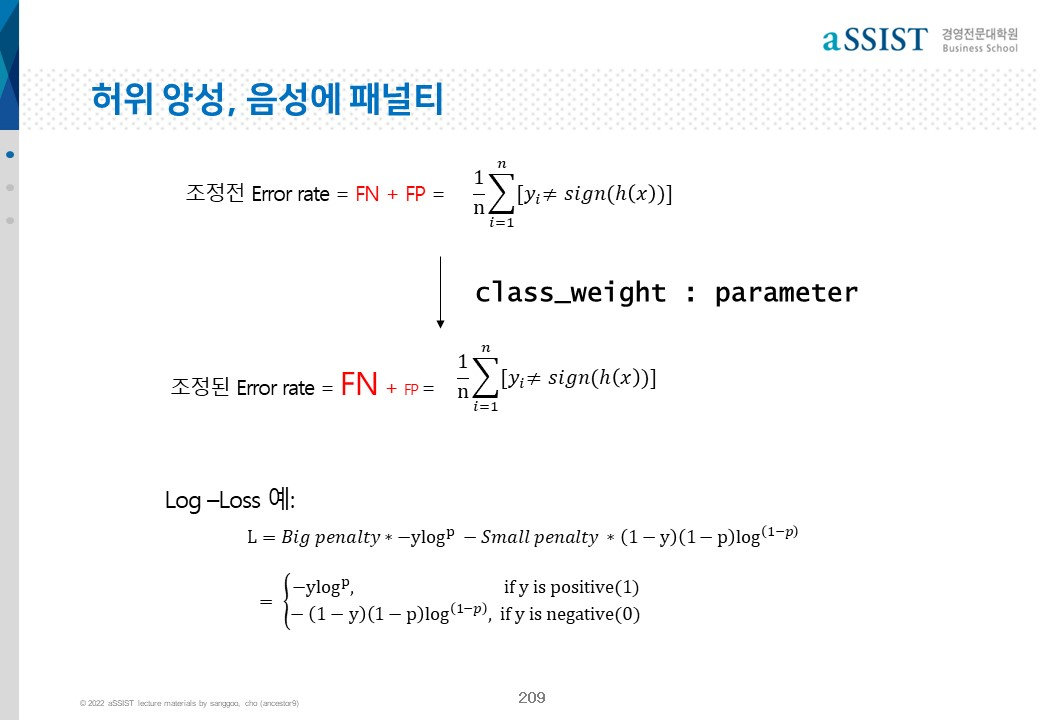

In [7]:
Image(filename=dir_path + '/슬라이드209.jpg', width=width, height=height)

In [22]:
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = model_selection.RandomizedSearchCV(model, params, cv=5, scoring= 'recall')
y_predict = grid.fit(X_train, y_train).predict(X_test)
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4950
           1       0.11      0.92      0.19        50

    accuracy                           0.92      5000
   macro avg       0.55      0.92      0.58      5000
weighted avg       0.99      0.92      0.95      5000



In [23]:
minor = np.sum(y)/len(y); major = 1- minor
model = LogisticRegression(solver='lbfgs', class_weight= {0: minor, 1: major})
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = model_selection.RandomizedSearchCV(model, params, cv=5, scoring= 'recall')
y_predict = grid.fit(X_train, y_train).predict(X_test)
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4950
           1       0.11      0.92      0.19        50

    accuracy                           0.92      5000
   macro avg       0.55      0.92      0.58      5000
weighted avg       0.99      0.92      0.95      5000



# END

(array([  5.,  15.,  57., 161., 228., 251., 159.,  89.,  24.,  11.]),
 array([-3.43656818, -2.77407614, -2.11158409, -1.44909205, -0.7866    ,
        -0.12410796,  0.53838408,  1.20087613,  1.86336817,  2.52586022,
         3.18835226]),
 <BarContainer object of 10 artists>)

(array([ 1.,  0.,  1.,  4., 13., 19., 25., 22.,  7.,  8.]),
 array([-1.83435547, -1.04268276, -0.25101004,  0.54066268,  1.3323354 ,
         2.12400811,  2.91568083,  3.70735355,  4.49902627,  5.29069899,
         6.0823717 ]),
 <BarContainer object of 10 artists>)

(1100, 1)

(1100,)

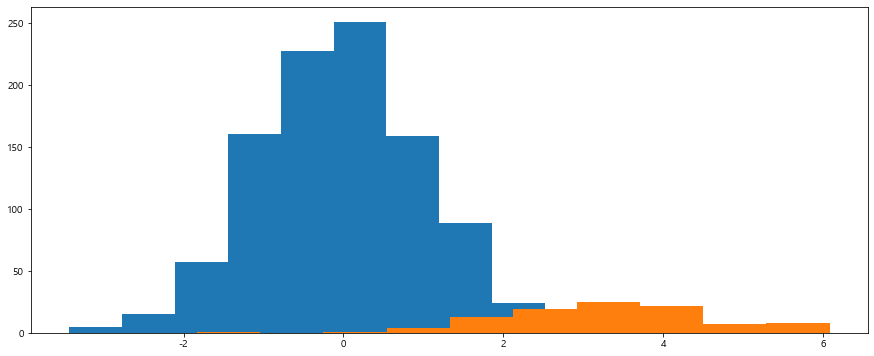

In [29]:
normal = sorted(np.random.normal(0, 1, 1000))
abnormal = sorted(np.random.normal(3, 1.5, 100))
plt.hist(normal); plt.hist(abnormal)
X= np.r_[normal, abnormal].reshape(-1,1)
y= np.r_[np.zeros(1000), np.ones(100)]
X.shape; y.shape

배열의 83 번째 slice해서 이후는 9를 누적하여 더한다


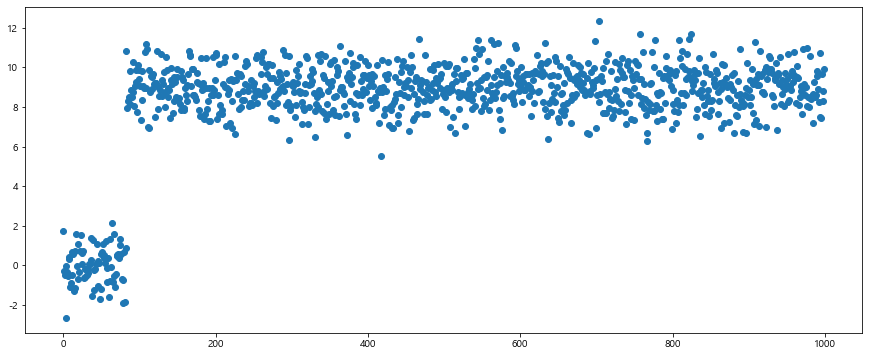

In [30]:
np.random.seed(11)
num_points= 1000
x = np.random.randn(num_points)
random_slice = int(np.random.rand()* num_points)
intt = np.random.randint(0, 10)
print(f'배열의 {random_slice} 번째 slice해서 이후는 {intt}를 누적하여 더한다')
x[random_slice:] += intt

plt.scatter(np.arange(len(x)), x)

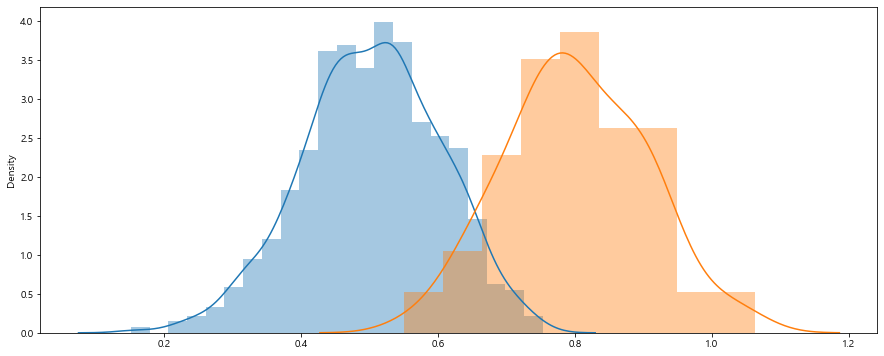

In [31]:
import seaborn as sns
mu, sigma = 0.5, 0.1
normal = np.random.normal(mu,sigma, 1000)
ax = sns.distplot(normal, kde=True)

mu, sigma = 0.8, 0.1
abnormal = np.random.normal(mu,sigma, 100)
ax = sns.distplot(abnormal, kde=True)

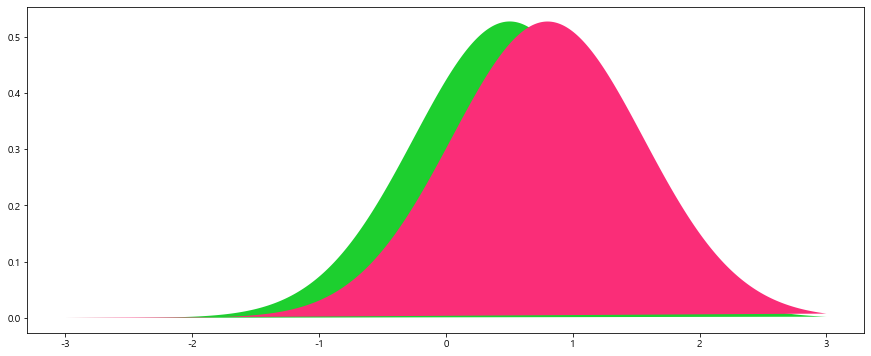

In [32]:
X_plot = np.linspace(-3, 3, 1000)[:, np.newaxis]  
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(normal.reshape(-1,1))
normal_dens = kde.score_samples(X_plot)
ax= plt.fill(X_plot[:, 0], np.exp(normal_dens), fc='#1dcf2f')

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(abnormal.reshape(-1,1))
abnormal_dens = kde.score_samples(X_plot)
ax= plt.fill(X_plot[:, 0], np.exp(abnormal_dens), fc='#fa2d78')